In [1]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA


In [18]:
num_samples = 2000
noise = .05
X, y = make_swiss_roll(num_samples, noise=noise)

In [19]:
import matplotlib.pyplot as plt

In [20]:
X.shape

(2000, 3)

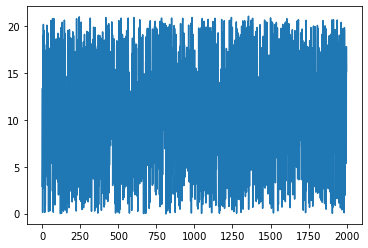

In [21]:
plt.plot(X[:, 1])

In [22]:
from sklearn.cluster import AgglomerativeClustering
import time
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")

Compute unstructured hierarchical clustering...
Elapsed time: 0.09s
Number of points: 2000


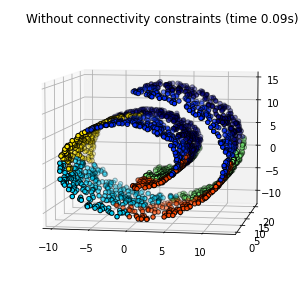

In [23]:
fig1 = plt.figure()
import numpy as np
ax1 = fig1.add_subplot(111,  projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )
_ = fig1.suptitle(f"Without connectivity constraints (time {elapsed_time:.2f}s)")

In [24]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=.04)
X_reduced  = rbf_pca.fit_transform(X)

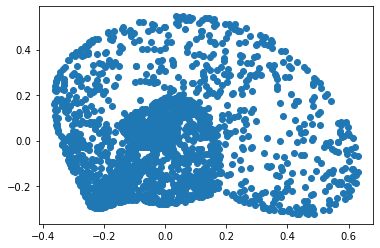

In [32]:
plt.scatter(X_reduced[:,0],X_reduced[:,1])